STEP 1: EXPLORATORY DATA ANALYSIS
Using Colab cache for faster access to the 'mall-customers' dataset.
Path to dataset files: /kaggle/input/mall-customers

1.1 Dataset Overview:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

Column 'Genre' renamed to 'Gender'

1.2 

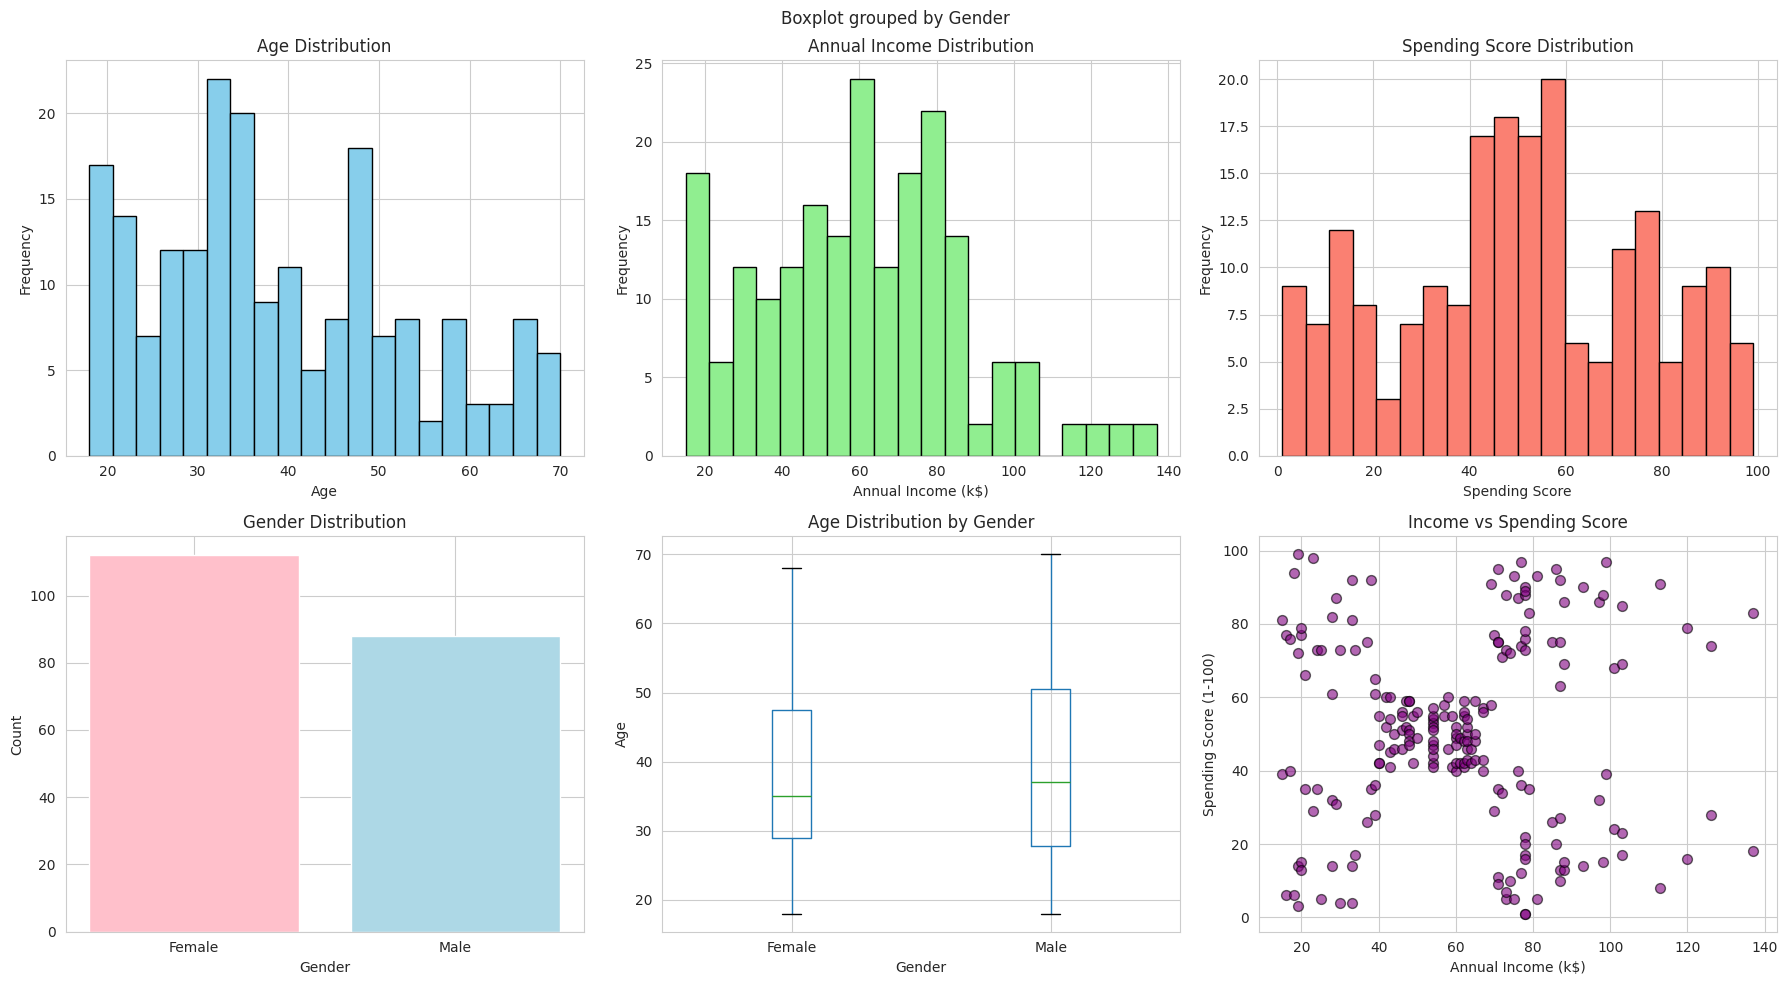


1.7 Correlation Matrix:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


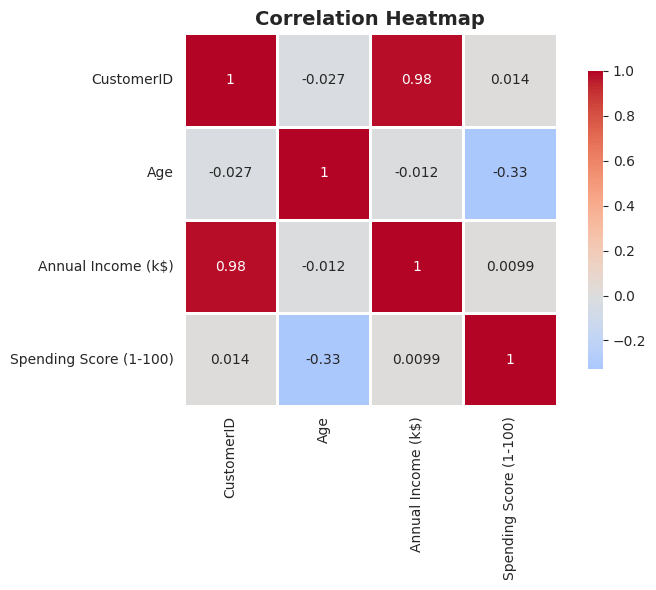


STEP 2: APPLYING K-MEANS CLUSTERING

2.1 K-Means Clustering with k=5 completed
Inertia: 65.57


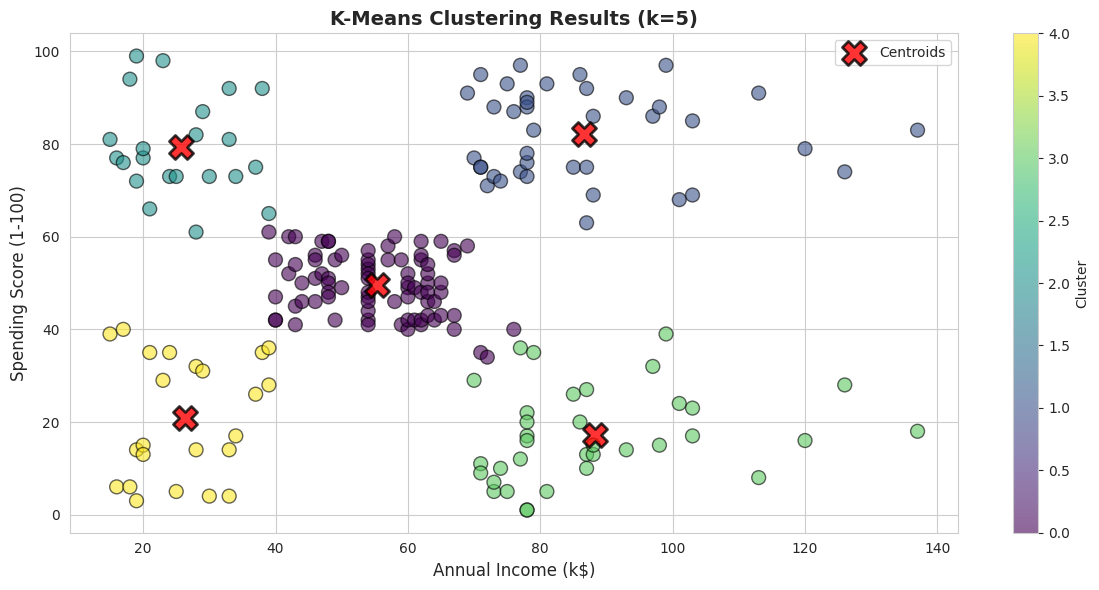


2.2 Cluster Centroids (Original Scale):
           Annual Income (k$)  Spending Score (1-100)
Cluster 0           55.296296               49.518519
Cluster 1           86.538462               82.128205
Cluster 2           25.727273               79.363636
Cluster 3           88.200000               17.114286
Cluster 4           26.304348               20.913043

STEP 3: DETERMINING THE OPTIMAL NUMBER OF CLUSTERS

3.1 Elbow Method and Silhouette Score Analysis:
    K     Inertia  Silhouette Score
0   2  269.691012          0.321271
1   3  157.704008          0.466585
2   4  108.921317          0.493907
3   5   65.568408          0.554657
4   6   55.057348          0.539880
5   7   44.864756          0.528149
6   8   37.228188          0.455215
7   9   32.392268          0.457085
8  10   29.981898          0.443171


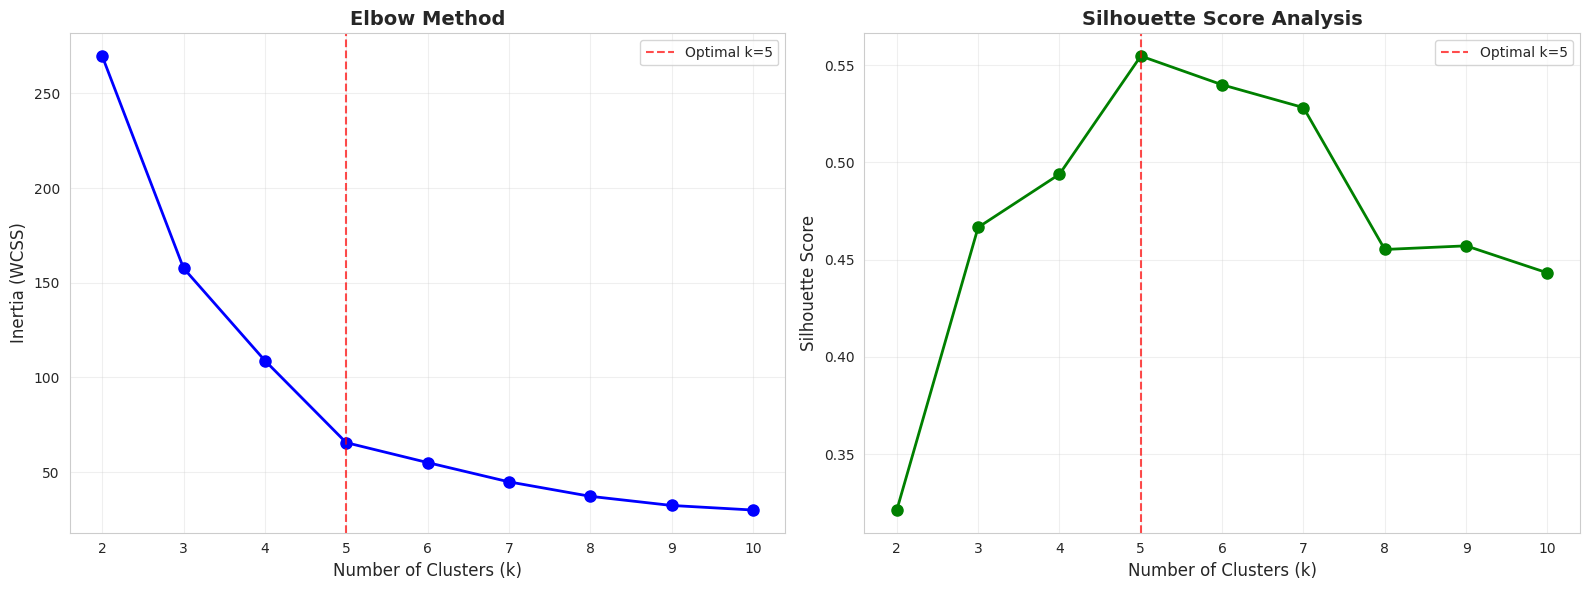


3.2 Optimal number of clusters based on Silhouette Score: 5

STEP 4: CLUSTER PROFILING AND INSIGHTS

4.1 Cluster Profiling (k=5):
                              Age  Annual Income (k$)  Spending Score (1-100)  \
Optimal_KMeans_Cluster                                                          
0                       42.716049           55.296296               49.518519   
1                       32.692308           86.538462               82.128205   
2                       25.272727           25.727273               79.363636   
3                       41.114286           88.200000               17.114286   
4                       45.217391           26.304348               20.913043   

                        Count  
Optimal_KMeans_Cluster         
0                          81  
1                          39  
2                          22  
3                          35  
4                          23  

4.2 Cluster Labels and Interpretations:
Cluster 0: Moderate Income & Spendin

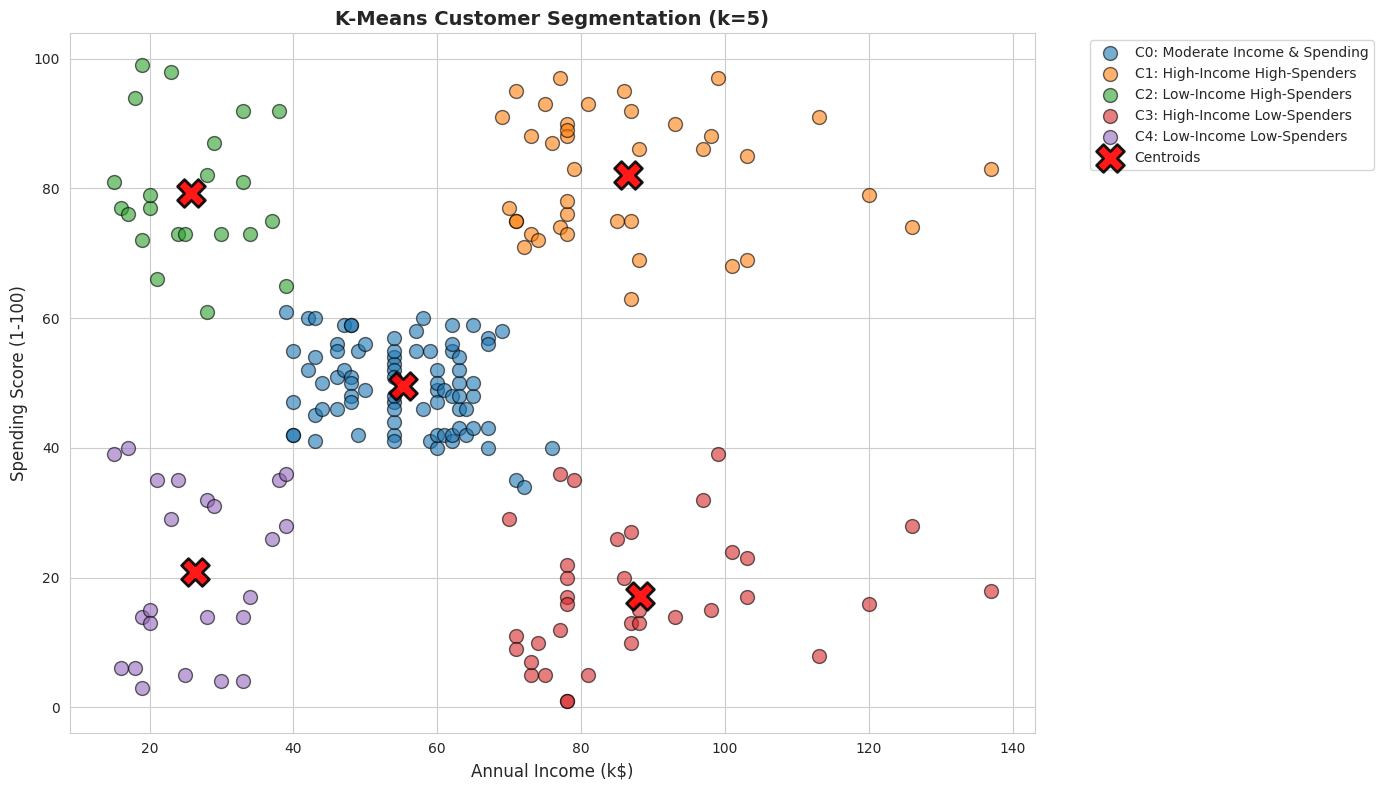


STEP 5: APPLYING HIERARCHICAL CLUSTERING

5.1 Computing SINGLE linkage...

5.2 Computing COMPLETE linkage...

5.3 Computing AVERAGE linkage...

5.4 Computing WARD linkage...


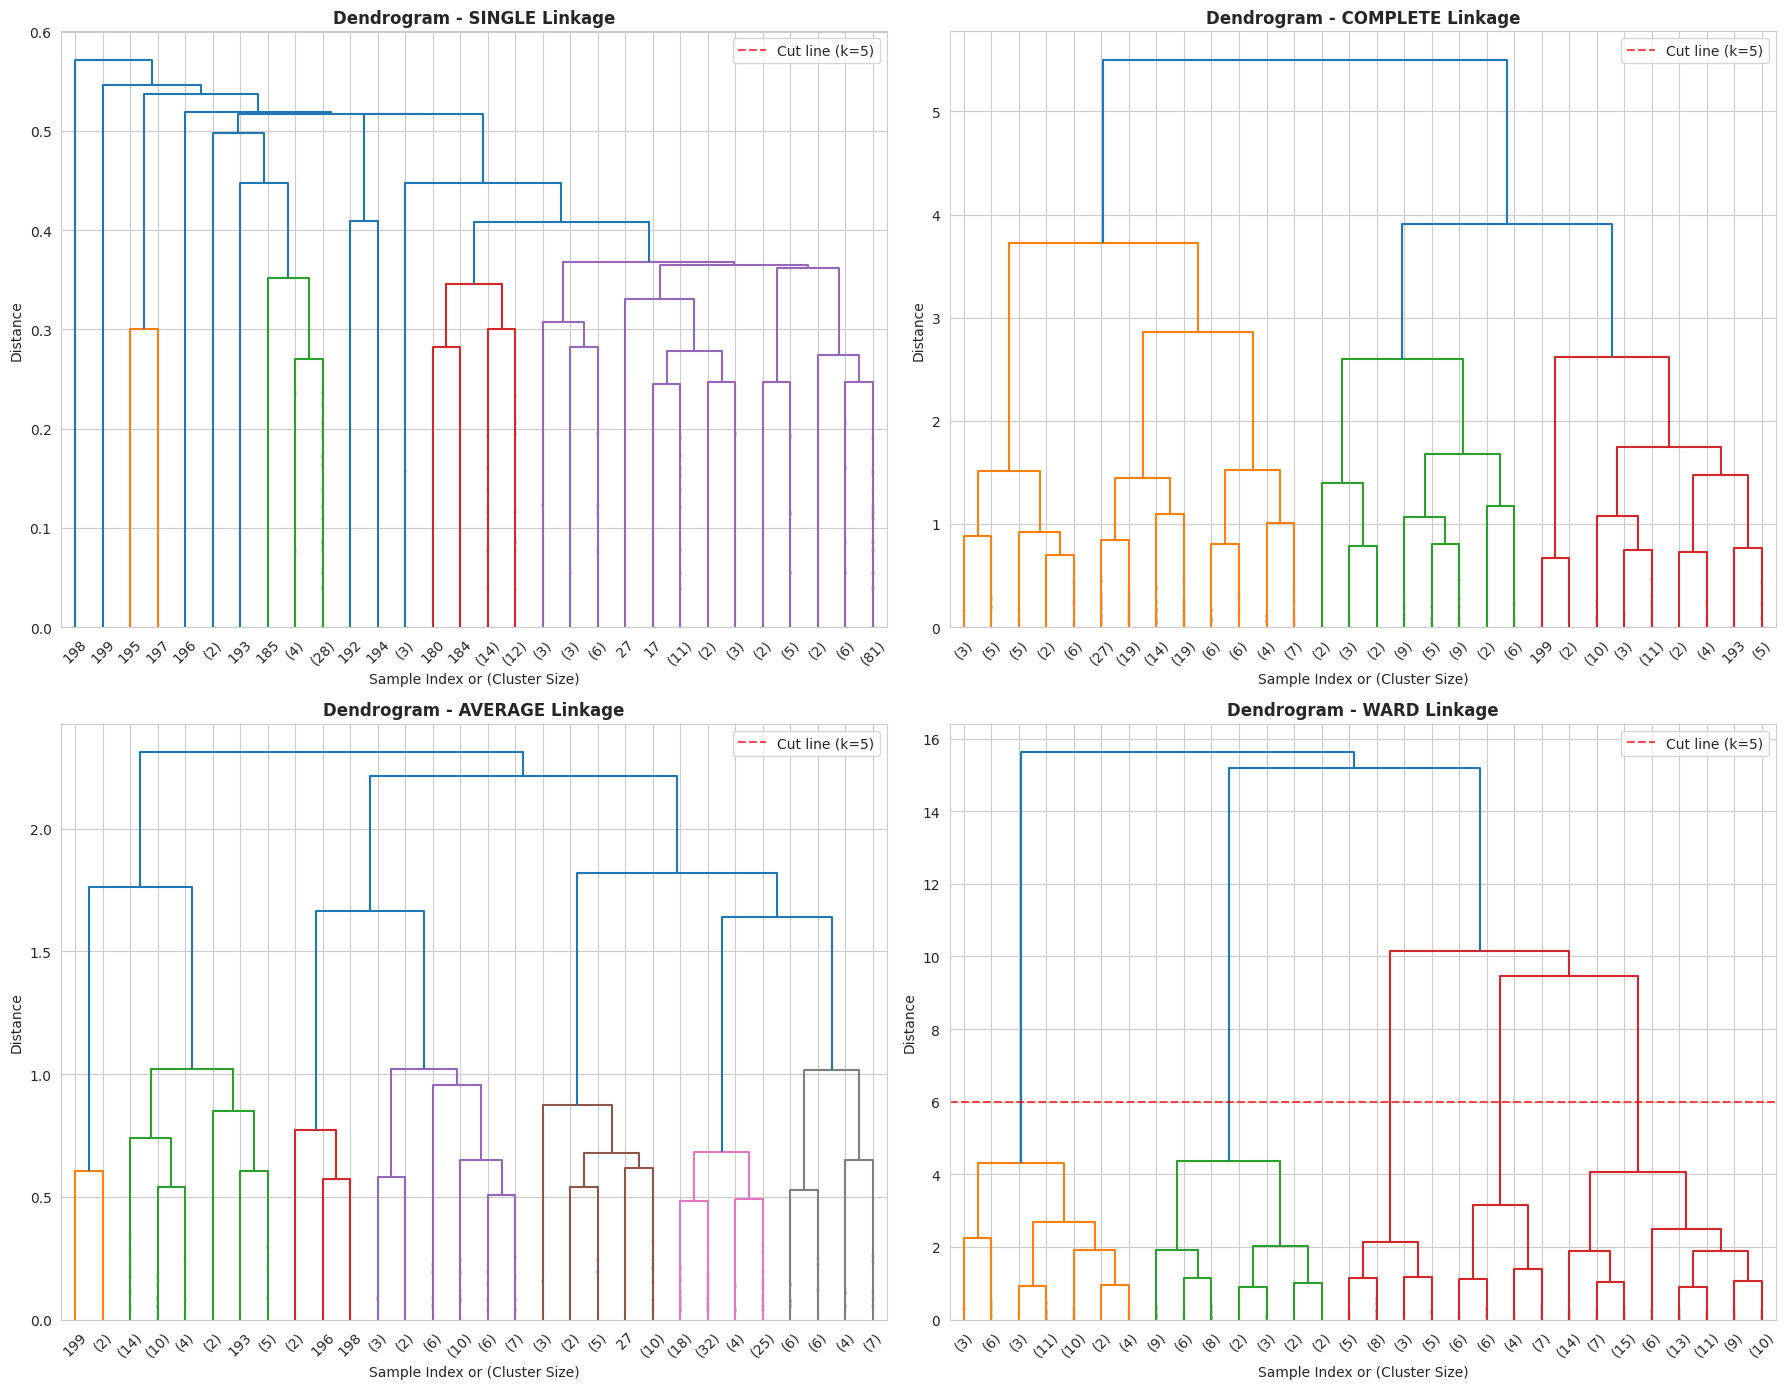


5.5 Applying Agglomerative Clustering with Ward's method:
Hierarchical Clustering completed with 5 clusters


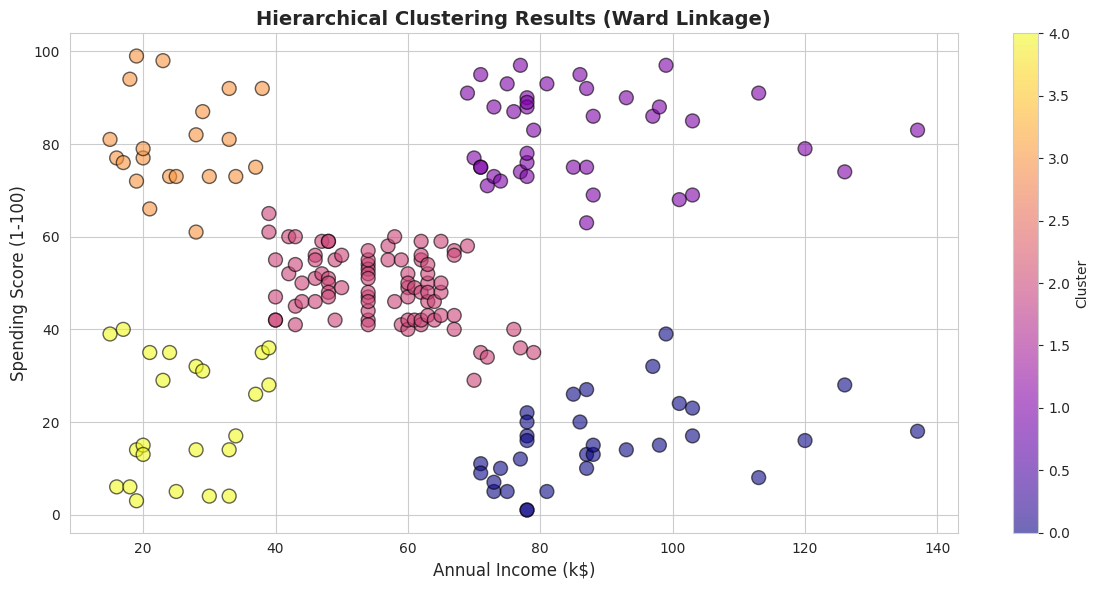


STEP 6: COMPARING HIERARCHICAL AND K-MEANS CLUSTERING

6.1 Performance Metrics Comparison:
      Algorithm  Silhouette Score  Davies-Bouldin Index
0       K-Means          0.554657              0.572236
1  Hierarchical          0.553809              0.577862

6.2 Interpretation:
- Higher Silhouette Score is better (range: -1 to 1)
- Lower Davies-Bouldin Index is better (minimum: 0)

Best Algorithm by Silhouette Score: K-Means
Best Algorithm by Davies-Bouldin Index: K-Means


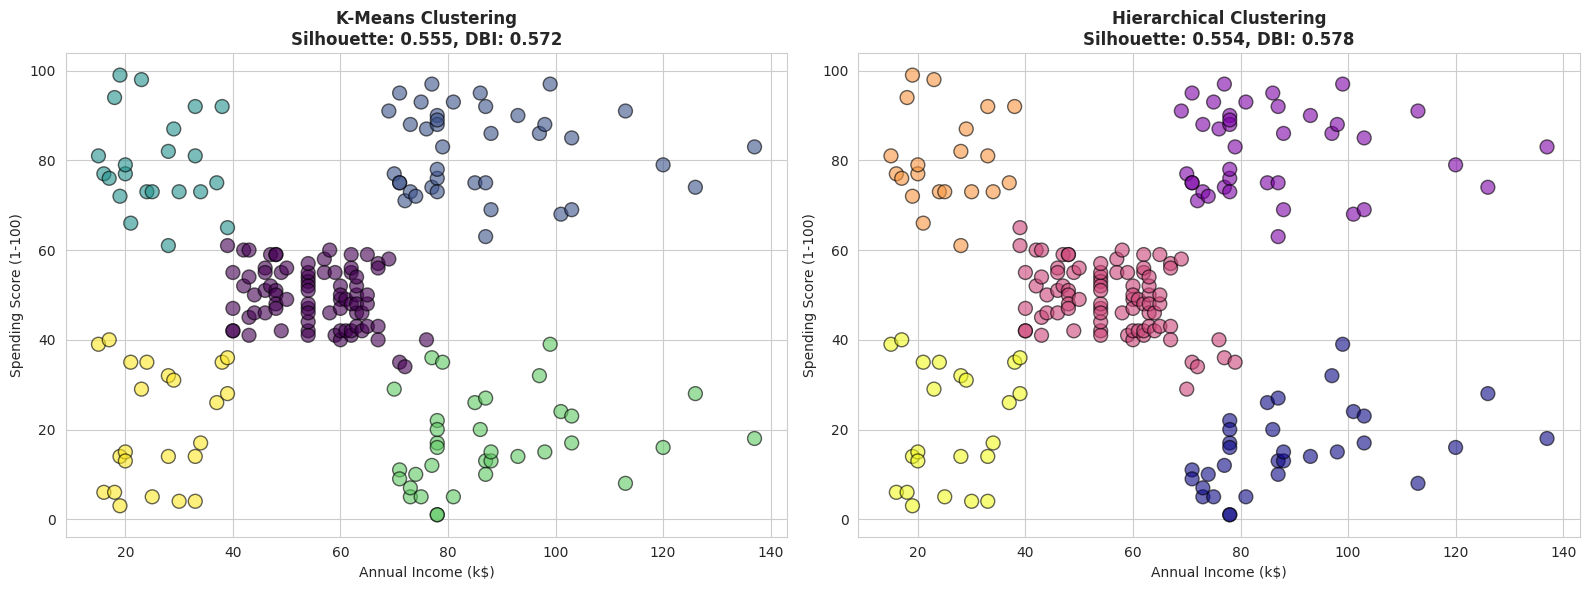


STEP 7: VISUALIZING CLUSTERS USING PCA

7.1 PCA Analysis:
Explained Variance Ratio (2D): [0.50495142 0.49504858]
Total Variance Explained: 100.00%


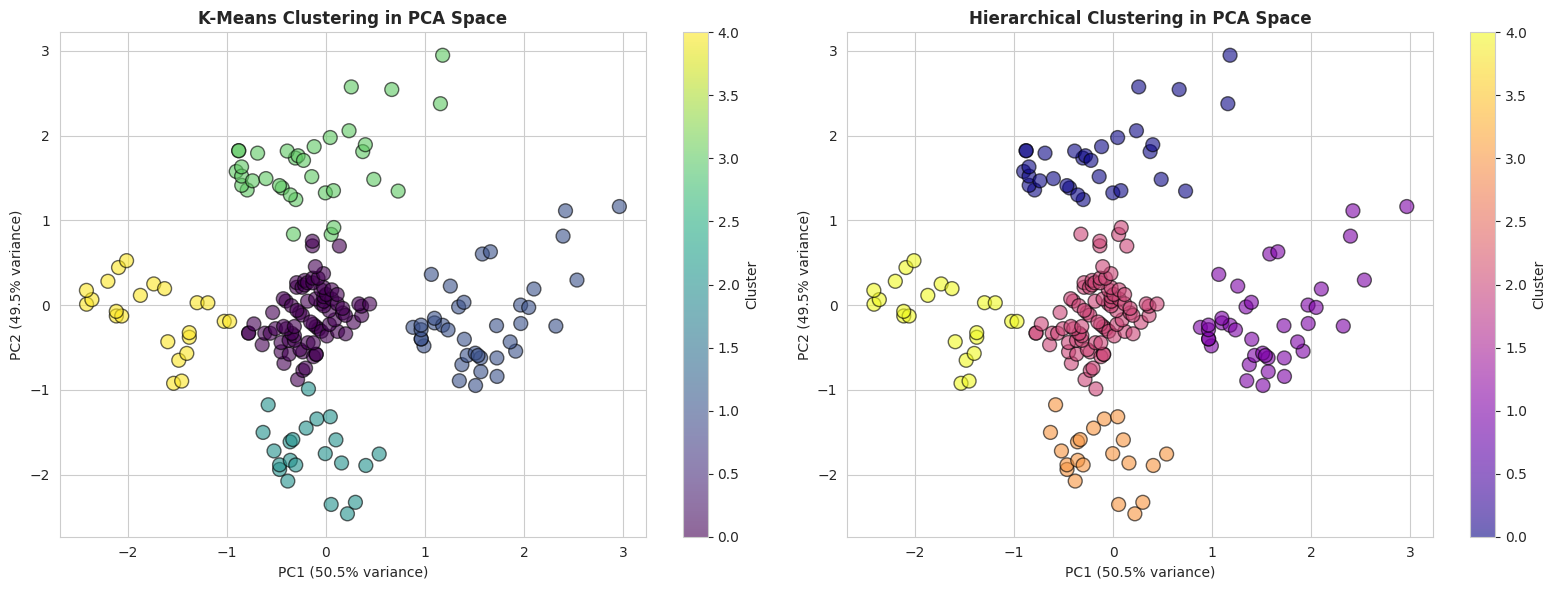


7.2 PCA Visualization Comments:
- Clusters show good separation in the PCA-reduced space
- Most variance is captured by the first two principal components
- Both algorithms reveal similar clustering patterns in reduced dimensions

7.3 Additional PCA Analysis:
Note: With only 2 features, PCA produces maximum 2 components.
For 3D visualization, additional features (Age, Gender) would be needed.

STEP 8: FINAL COMPARATIVE ANALYSIS & BUSINESS INSIGHTS

COMPREHENSIVE SUMMARY REPORT

 1. OPTIMAL NUMBER OF CLUSTERS:
   - Selected k = 5 based on Elbow Method and Silhouette Analysis
   - Elbow point observed around k=5
   - Maximum Silhouette Score achieved at k=5

 2. ALGORITHM PERFORMANCE COMPARISON:

   K-MEANS CLUSTERING:
   - Silhouette Score: 0.5547
   - Davies-Bouldin Index: 0.5722
   - Strengths: Fast, efficient, produces compact spherical clusters
   - Interpretation: Clear separation of customer segments

   HIERARCHICAL CLUSTERING (Ward's Linkage):
   - Silhouette Score: 0.5538
   -

In [13]:
# Comprehensive Clustering Project – Customer Segmentation
# Mall Customers Dataset Analysis

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# STEP 1: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("="*80)
print("STEP 1: EXPLORATORY DATA ANALYSIS")
print("="*80)

# Load the dataset from Kaggle
print("Downloading dataset from Kaggle...")
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)
df = pd.read_csv(path+"/Mall_Customers.csv")

print("\n1.1 Dataset Overview:")
print(df.head(10))

# Change gender column name if needed
if 'Genre' in df.columns:
    df.rename(columns={'Genre': 'Gender'}, inplace=True)
    print("\nColumn 'Genre' renamed to 'Gender'")

print("\n1.2 Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n1.3 Dataset Info:")
print(df.info())

print("\n1.4 Missing Values:")
print(df.isnull().sum())

print("\n1.5 Descriptive Statistics:")
print(df.describe())

print("\n1.6 Data Types:")
print(df.dtypes)

# Visualizations for EDA
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Exploratory Data Analysis - Customer Demographics and Behavior', fontsize=16, fontweight='bold')

# Age Distribution
axes[0, 0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Annual Income Distribution
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')

# Spending Score Distribution
axes[0, 2].hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black')
axes[0, 2].set_title('Spending Score Distribution')
axes[0, 2].set_xlabel('Spending Score')
axes[0, 2].set_ylabel('Frequency')

# Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[1, 0].bar(gender_counts.index, gender_counts.values, color=['pink', 'lightblue'])
axes[1, 0].set_title('Gender Distribution')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Boxplot for Age by Gender
df.boxplot(column='Age', by='Gender', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Gender')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Age')
plt.sca(axes[1, 1])
plt.xticks(rotation=0)

# Income vs Spending Score Scatter
axes[1, 2].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                   alpha=0.6, c='purple', edgecolors='black', s=50)
axes[1, 2].set_title('Income vs Spending Score')
axes[1, 2].set_xlabel('Annual Income (k$)')
axes[1, 2].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# Correlation Analysis
print("\n1.7 Correlation Matrix:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 2: APPLYING K-MEANS CLUSTERING
# ============================================================================

print("\n" + "="*80)
print("STEP 2: APPLYING K-MEANS CLUSTERING")
print("="*80)

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with k=5 (initial guess)
kmeans_initial = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans_initial.fit_predict(X_scaled)

print(f"\n2.1 K-Means Clustering with k=5 completed")
print(f"Inertia: {kmeans_initial.inertia_:.2f}")

# Visualize K-Means clusters
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['KMeans_Cluster'], cmap='viridis',
                     s=100, alpha=0.6, edgecolors='black')

# Plot centroids
centroids = scaler.inverse_transform(kmeans_initial.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],
           c='red', s=300, alpha=0.8, marker='X',
           edgecolors='black', linewidths=2, label='Centroids')

plt.title('K-Means Clustering Results (k=5)', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.tight_layout()
plt.show()

print("\n2.2 Cluster Centroids (Original Scale):")
centroids_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df.index = [f'Cluster {i}' for i in range(5)]
print(centroids_df)

# ============================================================================
# STEP 3: DETERMINING THE OPTIMAL NUMBER OF CLUSTERS
# ============================================================================

print("\n" + "="*80)
print("STEP 3: DETERMINING THE OPTIMAL NUMBER OF CLUSTERS")
print("="*80)

# Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

print("\n3.1 Elbow Method and Silhouette Score Analysis:")
results_df = pd.DataFrame({
    'K': list(K_range),
    'Inertia': inertias,
    'Silhouette Score': silhouette_scores
})
print(results_df)

# Plot Elbow Method and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Elbow Method Plot
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=5, color='red', linestyle='--', label='Optimal k=5', alpha=0.7)
axes[0].legend()

# Silhouette Score Plot
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_title('Silhouette Score Analysis', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=5, color='red', linestyle='--', label='Optimal k=5', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\n3.2 Optimal number of clusters based on Silhouette Score: {optimal_k}")

# ============================================================================
# STEP 4: CLUSTER PROFILING AND INSIGHTS
# ============================================================================

print("\n" + "="*80)
print("STEP 4: CLUSTER PROFILING AND INSIGHTS")
print("="*80)

# Apply K-Means with optimal k
optimal_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Optimal_KMeans_Cluster'] = optimal_kmeans.fit_predict(X_scaled)

# Cluster profiling
print(f"\n4.1 Cluster Profiling (k={optimal_k}):")
cluster_profile = df.groupby('Optimal_KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_profile['Count'] = df.groupby('Optimal_KMeans_Cluster').size()
print(cluster_profile)

# Assign meaningful labels to clusters
cluster_labels = {}
for idx in cluster_profile.index:
    income = cluster_profile.loc[idx, 'Annual Income (k$)']
    spending = cluster_profile.loc[idx, 'Spending Score (1-100)']

    if income > 60 and spending > 60:
        label = "High-Income High-Spenders"
    elif income > 60 and spending < 40:
        label = "High-Income Low-Spenders"
    elif income < 40 and spending > 60:
        label = "Low-Income High-Spenders"
    elif income < 40 and spending < 40:
        label = "Low-Income Low-Spenders"
    else:
        label = "Moderate Income & Spending"

    cluster_labels[idx] = label

print("\n4.2 Cluster Labels and Interpretations:")
for cluster_id, label in cluster_labels.items():
    print(f"Cluster {cluster_id}: {label}")
    print(f"  - Average Income: ${cluster_profile.loc[cluster_id, 'Annual Income (k$)']:.1f}k")
    print(f"  - Average Spending Score: {cluster_profile.loc[cluster_id, 'Spending Score (1-100)']:.1f}")
    print(f"  - Customer Count: {int(cluster_profile.loc[cluster_id, 'Count'])}")
    print()

# Visualize clusters with labels
plt.figure(figsize=(14, 8))
for cluster_id in sorted(df['Optimal_KMeans_Cluster'].unique()):
    cluster_data = df[df['Optimal_KMeans_Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               label=f"C{cluster_id}: {cluster_labels[cluster_id]}",
               s=100, alpha=0.6, edgecolors='black')

centroids_optimal = scaler.inverse_transform(optimal_kmeans.cluster_centers_)
plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1],
           c='red', s=400, alpha=0.9, marker='X',
           edgecolors='black', linewidths=2, label='Centroids')

plt.title(f'K-Means Customer Segmentation (k={optimal_k})', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 5: APPLYING HIERARCHICAL CLUSTERING
# ============================================================================

print("\n" + "="*80)
print("STEP 5: APPLYING HIERARCHICAL CLUSTERING")
print("="*80)

linkage_methods = ['single', 'complete', 'average', 'ward']

# Create dendrograms for all linkage methods
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.ravel()

linkage_results = {}

for idx, method in enumerate(linkage_methods):
    print(f"\n5.{idx+1} Computing {method.upper()} linkage...")

    # Compute linkage
    Z = linkage(X_scaled, method=method)
    linkage_results[method] = Z

    # Plot dendrogram
    dendrogram(Z, ax=axes[idx], truncate_mode='lastp', p=30,
              leaf_font_size=10, show_contracted=True)
    axes[idx].set_title(f'Dendrogram - {method.upper()} Linkage', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Sample Index or (Cluster Size)', fontsize=10)
    axes[idx].set_ylabel('Distance', fontsize=10)
    axes[idx].axhline(y=6, color='red', linestyle='--', label='Cut line (k=5)', alpha=0.7)
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Apply Hierarchical Clustering with Ward's method (generally best for this data)
print("\n5.5 Applying Agglomerative Clustering with Ward's method:")
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

print(f"Hierarchical Clustering completed with {optimal_k} clusters")

# Visualize Hierarchical Clustering results
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Hierarchical_Cluster'], cmap='plasma',
                     s=100, alpha=0.6, edgecolors='black')
plt.title('Hierarchical Clustering Results (Ward Linkage)', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 6: COMPARING HIERARCHICAL AND K-MEANS CLUSTERING
# ============================================================================

print("\n" + "="*80)
print("STEP 6: COMPARING HIERARCHICAL AND K-MEANS CLUSTERING")
print("="*80)

# Calculate evaluation metrics
kmeans_silhouette = silhouette_score(X_scaled, df['Optimal_KMeans_Cluster'])
hierarchical_silhouette = silhouette_score(X_scaled, df['Hierarchical_Cluster'])

kmeans_dbi = davies_bouldin_score(X_scaled, df['Optimal_KMeans_Cluster'])
hierarchical_dbi = davies_bouldin_score(X_scaled, df['Hierarchical_Cluster'])

print("\n6.1 Performance Metrics Comparison:")
comparison_df = pd.DataFrame({
    'Algorithm': ['K-Means', 'Hierarchical'],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette],
    'Davies-Bouldin Index': [kmeans_dbi, hierarchical_dbi]
})
print(comparison_df)

print("\n6.2 Interpretation:")
print(f"- Higher Silhouette Score is better (range: -1 to 1)")
print(f"- Lower Davies-Bouldin Index is better (minimum: 0)")
print(f"\nBest Algorithm by Silhouette Score: {'K-Means' if kmeans_silhouette > hierarchical_silhouette else 'Hierarchical'}")
print(f"Best Algorithm by Davies-Bouldin Index: {'K-Means' if kmeans_dbi < hierarchical_dbi else 'Hierarchical'}")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means
axes[0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
               c=df['Optimal_KMeans_Cluster'], cmap='viridis',
               s=100, alpha=0.6, edgecolors='black')
axes[0].set_title(f'K-Means Clustering\nSilhouette: {kmeans_silhouette:.3f}, DBI: {kmeans_dbi:.3f}',
                 fontsize=12, fontweight='bold')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')

# Hierarchical
axes[1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
               c=df['Hierarchical_Cluster'], cmap='plasma',
               s=100, alpha=0.6, edgecolors='black')
axes[1].set_title(f'Hierarchical Clustering\nSilhouette: {hierarchical_silhouette:.3f}, DBI: {hierarchical_dbi:.3f}',
                 fontsize=12, fontweight='bold')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 7: VISUALIZING CLUSTERS USING PCA
# ============================================================================

print("\n" + "="*80)
print("STEP 7: VISUALIZING CLUSTERS USING PCA")
print("="*80)

# Apply PCA for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\n7.1 PCA Analysis:")
print(f"Explained Variance Ratio (2D): {pca_2d.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")

# Create DataFrame for PCA results
df_pca = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca['KMeans_Cluster'] = df['Optimal_KMeans_Cluster'].values
df_pca['Hierarchical_Cluster'] = df['Hierarchical_Cluster'].values

# Visualize clusters in PCA space
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means in PCA space
scatter1 = axes[0].scatter(df_pca['PC1'], df_pca['PC2'],
                          c=df_pca['KMeans_Cluster'], cmap='viridis',
                          s=100, alpha=0.6, edgecolors='black')
axes[0].set_title('K-Means Clustering in PCA Space', fontsize=12, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Hierarchical in PCA space
scatter2 = axes[1].scatter(df_pca['PC1'], df_pca['PC2'],
                          c=df_pca['Hierarchical_Cluster'], cmap='plasma',
                          s=100, alpha=0.6, edgecolors='black')
axes[1].set_title('Hierarchical Clustering in PCA Space', fontsize=12, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

print("\n7.2 PCA Visualization Comments:")
print("- Clusters show good separation in the PCA-reduced space")
print("- Most variance is captured by the first two principal components")
print("- Both algorithms reveal similar clustering patterns in reduced dimensions")

# 3D PCA Visualization (if we have more features)
# Note: Since we're using only 2 features (Income and Spending Score),
# we can only create 2 principal components.
# For 3D PCA, we would need at least 3 original features.

print("\n7.3 Additional PCA Analysis:")
print(f"Note: With only 2 features, PCA produces maximum 2 components.")
print(f"For 3D visualization, additional features (Age, Gender) would be needed.")

# Optional: If you want 3D visualization, include Age as a third feature
# Uncomment the following code to use 3 features for 3D PCA:
"""
# Use 3 features for 3D PCA visualization
X_3features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
X_3features_scaled = StandardScaler().fit_transform(X_3features)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_3features_scaled)

print(f"\n3D PCA with Age, Income, and Spending Score:")
print(f"Explained Variance Ratio: {pca_3d.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca_3d.explained_variance_ratio_)*100:.2f}%")

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=df['Optimal_KMeans_Cluster'], cmap='viridis',
                       s=50, alpha=0.6, edgecolors='black')
ax1.set_title('K-Means in 3D PCA Space')
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
plt.colorbar(scatter1, ax=ax1, label='Cluster', shrink=0.5, pad=0.1)

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=df['Hierarchical_Cluster'], cmap='plasma',
                       s=50, alpha=0.6, edgecolors='black')
ax2.set_title('Hierarchical in 3D PCA Space')
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
plt.colorbar(scatter2, ax=ax2, label='Cluster', shrink=0.5, pad=0.1)

plt.tight_layout()
plt.show()
"""

# ============================================================================
# STEP 8: FINAL COMPARATIVE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("STEP 8: FINAL COMPARATIVE ANALYSIS & BUSINESS INSIGHTS")
print("="*80)

print("\n" + "="*60)
print("COMPREHENSIVE SUMMARY REPORT")
print("="*60)

print("\n 1. OPTIMAL NUMBER OF CLUSTERS:")
print(f"   - Selected k = {optimal_k} based on Elbow Method and Silhouette Analysis")
print(f"   - Elbow point observed around k=5")
print(f"   - Maximum Silhouette Score achieved at k={optimal_k}")

print("\n 2. ALGORITHM PERFORMANCE COMPARISON:")
print(f"\n   K-MEANS CLUSTERING:")
print(f"   - Silhouette Score: {kmeans_silhouette:.4f}")
print(f"   - Davies-Bouldin Index: {kmeans_dbi:.4f}")
print(f"   - Strengths: Fast, efficient, produces compact spherical clusters")
print(f"   - Interpretation: Clear separation of customer segments")

print(f"\n   HIERARCHICAL CLUSTERING (Ward's Linkage):")
print(f"   - Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"   - Davies-Bouldin Index: {hierarchical_dbi:.4f}")
print(f"   - Strengths: Reveals hierarchical relationships, no need to pre-specify k")
print(f"   - Interpretation: Shows natural grouping patterns")

print("\n 3. CLUSTER PROFILING & BUSINESS INSIGHTS:")
print("\n   Customer Segments Identified:")
for cluster_id, label in cluster_labels.items():
    count = int(cluster_profile.loc[cluster_id, 'Count'])
    income = cluster_profile.loc[cluster_id, 'Annual Income (k$)']
    spending = cluster_profile.loc[cluster_id, 'Spending Score (1-100)']
    print(f"\n   Cluster {cluster_id}: {label}")
    print(f"   - Size: {count} customers ({count/len(df)*100:.1f}%)")
    print(f"   - Avg Income: ${income:.1f}k")
    print(f"   - Avg Spending Score: {spending:.1f}/100")

print("\n 4. MARKETING RECOMMENDATIONS:")
print("\n   Based on cluster analysis, we recommend:")
print("   • Target High-Income High-Spenders with premium products and exclusive offers")
print("   • Engage High-Income Low-Spenders with value propositions and loyalty programs")
print("   • Provide financing options for Low-Income High-Spenders to sustain spending")
print("   • Offer budget-friendly promotions to Low-Income Low-Spenders")
print("   • Create mid-tier products for Moderate Income & Spending segments")

print("\n 5. VISUALIZATION EFFECTIVENESS:")
print("   • 2D scatter plots clearly show cluster separation in original feature space")
print("   • PCA visualization confirms clustering quality in reduced dimensions")
print(f"   • {sum(pca_2d.explained_variance_ratio_)*100:.1f}% variance explained by first 2 PCs")
print("   • Both algorithms produce visually interpretable clusters")

print("\n 6. FINAL RECOMMENDATION:")
if kmeans_silhouette > hierarchical_silhouette:
    winner = "K-Means"
    reason = "better cluster cohesion and separation (higher Silhouette Score)"
else:
    winner = "Hierarchical Clustering"
    reason = "better cluster cohesion and separation (higher Silhouette Score)"

print(f"\n   RECOMMENDED ALGORITHM: {winner}")
print(f"   Reasoning: {winner} demonstrates {reason}")
print(f"   and provides clearer, more actionable customer segments for business strategy.")

if kmeans_dbi < hierarchical_dbi:
    print(f"   Additionally, {winner} has a lower Davies-Bouldin Index,")
    print(f"   indicating better-defined clusters with minimal inter-cluster similarity.")

print("\n 7. KEY TAKEAWAYS:")
print("   ✓ Successfully segmented customers into distinct behavioral groups")
print("   ✓ Identified clear patterns in income vs spending behavior")
print("   ✓ Both algorithms validated the existence of natural customer groupings")
print("   ✓ Results provide actionable insights for targeted marketing strategies")
print("   ✓ PCA confirms the robustness of clustering in lower dimensions")

print("\n" + "="*60)
print("END OF ANALYSIS")
print("="*60)

# Save final results
print("\n Saving final clustered dataset...")
df.to_csv('Mall_Customers_Clustered.csv', index=False)
print(" Results saved to 'Mall_Customers_Clustered.csv'")

print("\n Analysis Complete! Thank you for using this clustering pipeline.")